In [1]:
from ipynb.fs.full.Functions import *

In [2]:
def maxmin(Con):
    try:

        maximum = np.array([])
        minimum = np.array([])


        for C in Con:
            C = C[0][500:]
            peaks, bs = find_peaks(C)
            locmax = np.max(C[peaks])
            maximum = np.append(maximum,locmax)

            lows = argrelmin(C, axis=0)
            lows = np.array(lows)
            lows = lows[0]
            locmin = np.min(C[lows])

            minimum = np.append(minimum, locmin)
        return maximum, minimum
    except IndexError:
        maximum = np.array([])
        minimum = np.array([])


        for C in Con:
            C = C[200:]
            peaks, bs = find_peaks(C)
            locmax = np.max(C[peaks])
            maximum = np.append(maximum,locmax)

            lows = argrelmin(C, axis=0)
            lows = np.array(lows)
            lows = lows[0]
            locmin = np.min(C[lows])

            minimum = np.append(minimum, locmin)
        return maximum, minimum
        

In [13]:
m2 = np.arange(0,np.pi, 0.05)

Con = np.ndarray(shape=(m2.size, 26,1342))

print(Con.shape)


(63, 26, 1342)


In [14]:
for i,m in enumerate(m2):
    Con[i] = get_Q_arr(phaseM2 = 2*m)[1]
    

In [15]:
maximum, minimum = maxmin(Con)

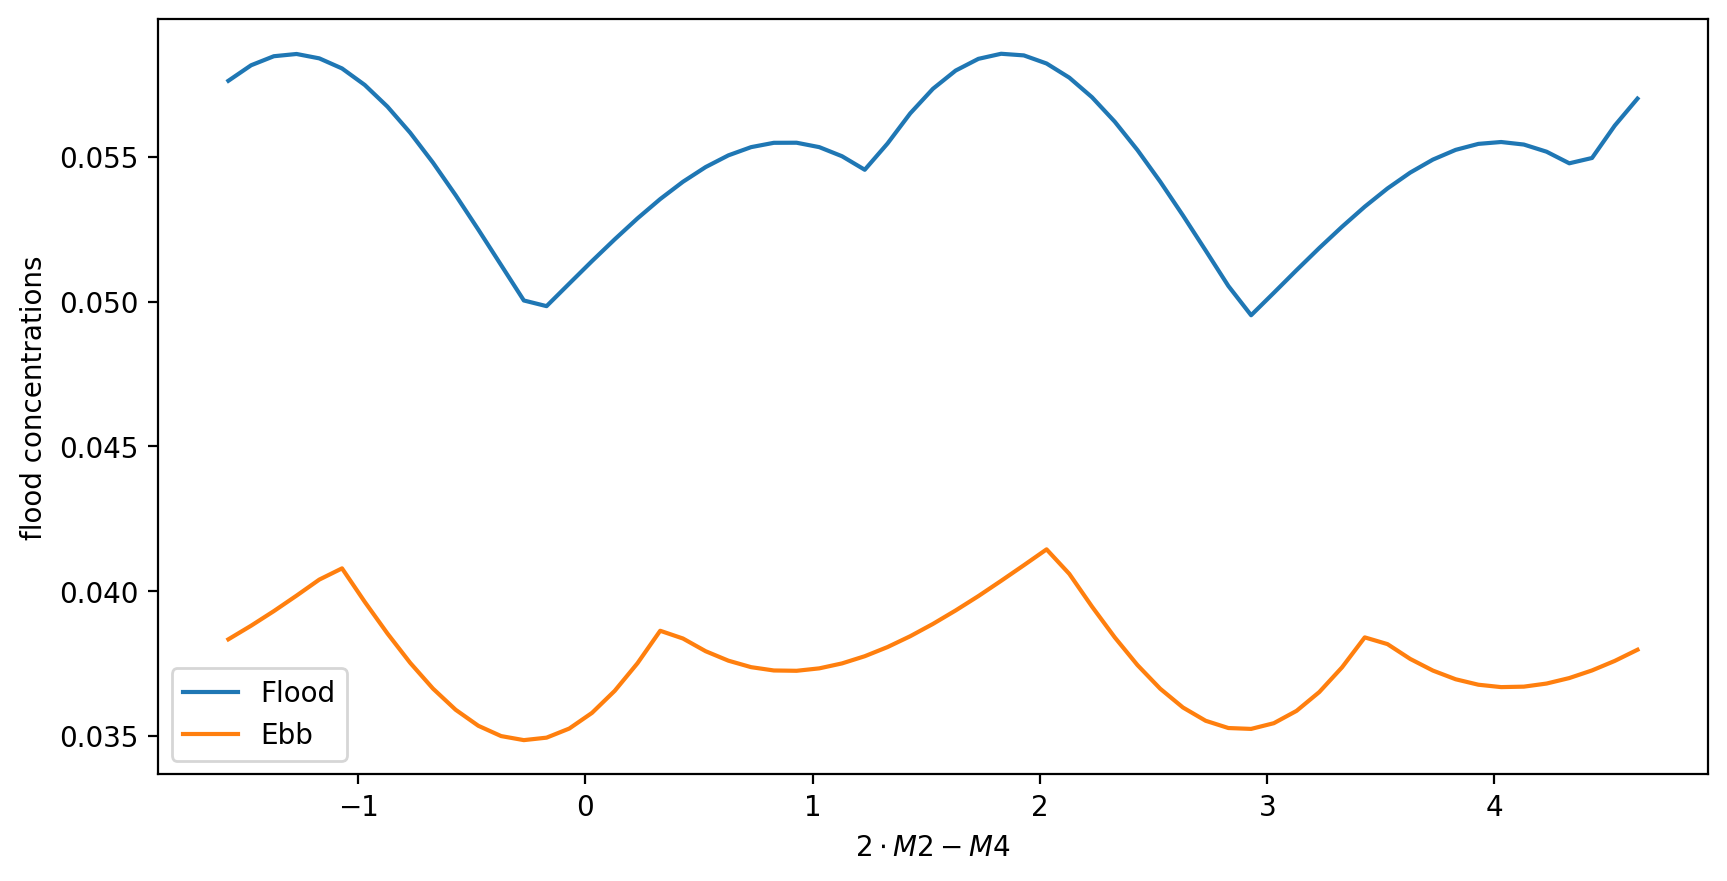

In [16]:
plt.plot(2*m2 - np.pi/2, maximum,label='Flood') 
plt.ylabel('flood concentrations')
plt.xlabel('$2 \cdot M2 - M4$ ')
plt.plot(2*m2 - np.pi/2,minimum, label="Ebb")
plt.legend()

In [7]:
scalar = np.linspace(0.5,10,100)
Wvar = scalar * 5e-4


ConValDict = {}
for i,W in enumerate(Wvar):
    ConValDict[f'CVD_{i}'.format(i)] = get_Q_arr(Ws=W)[1]

CVAL = []

for i,val in enumerate(ConValDict):
    CVAL.append(ConValDict[val][0])

In [8]:
ma, mi = maxmin(CVAL)


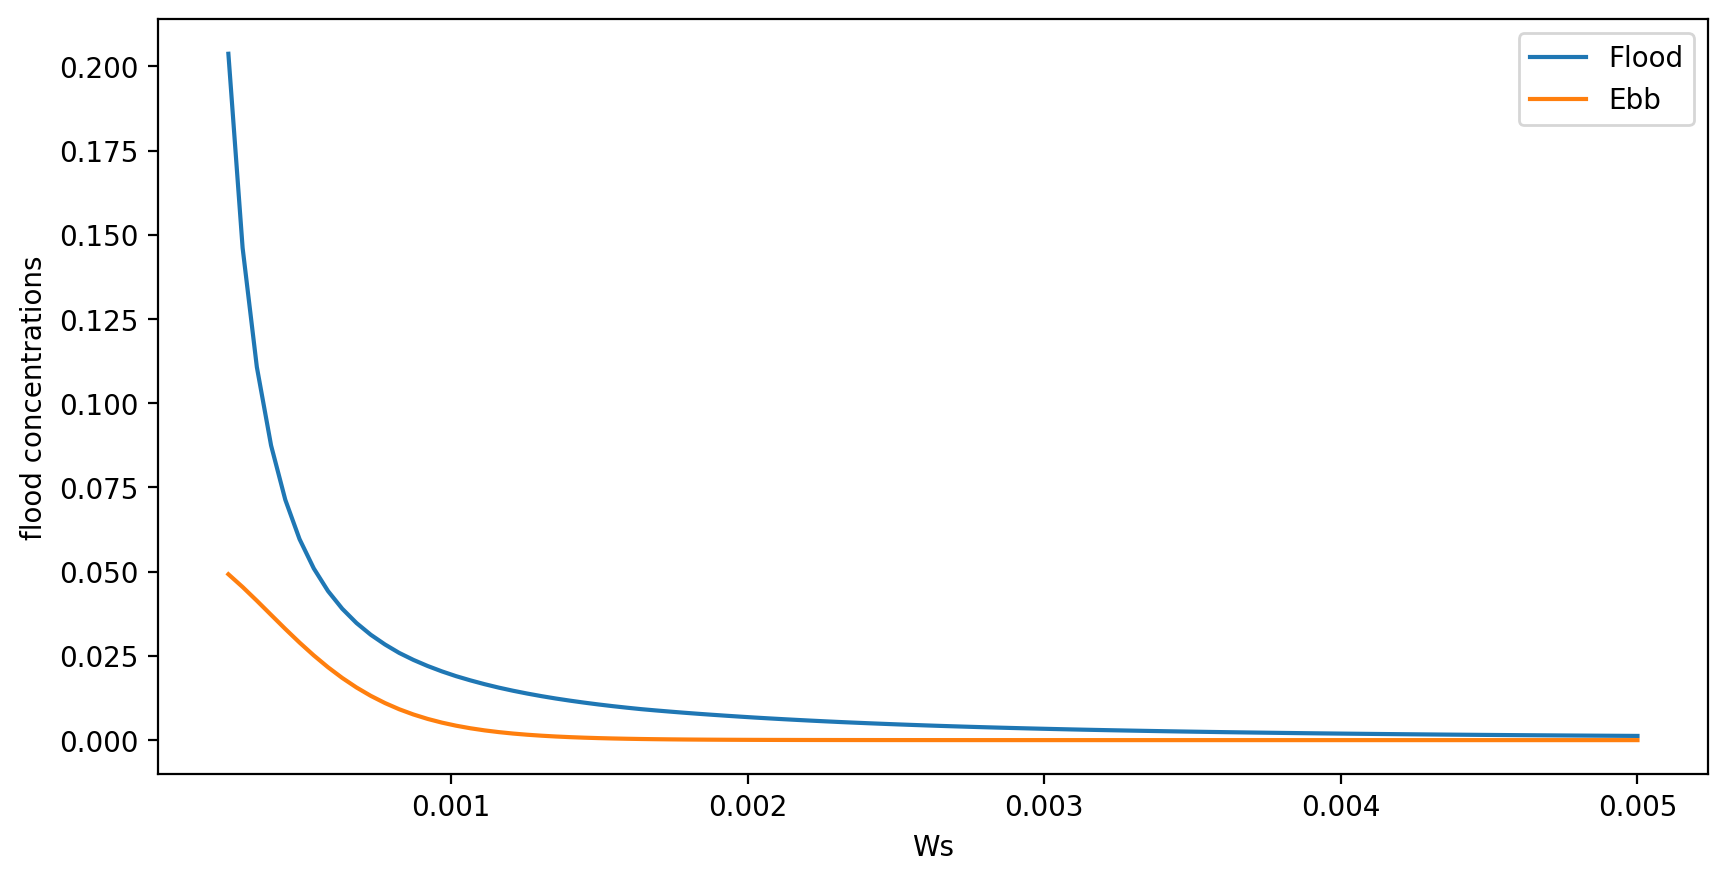

In [9]:
plt.plot(Wvar,ma,label='Flood')
plt.ylabel('flood concentrations')
plt.xlabel("Ws")
plt.plot(Wvar,mi,label='Ebb')
plt.legend()

In [10]:
scalar = np.linspace(0.5,5,100)
Kvar = scalar * 1e-2


ConEdDict = {}
for i,K in enumerate(Kvar):
    ConEdDict[f'KVD_{i}'.format(i)] = get_Q_arr(Kv=K)[1]

KVAL = []

for i,val in enumerate(ConEdDict):
    KVAL.append(ConEdDict[val][0])

In [11]:
maK, miK = maxmin(KVAL)

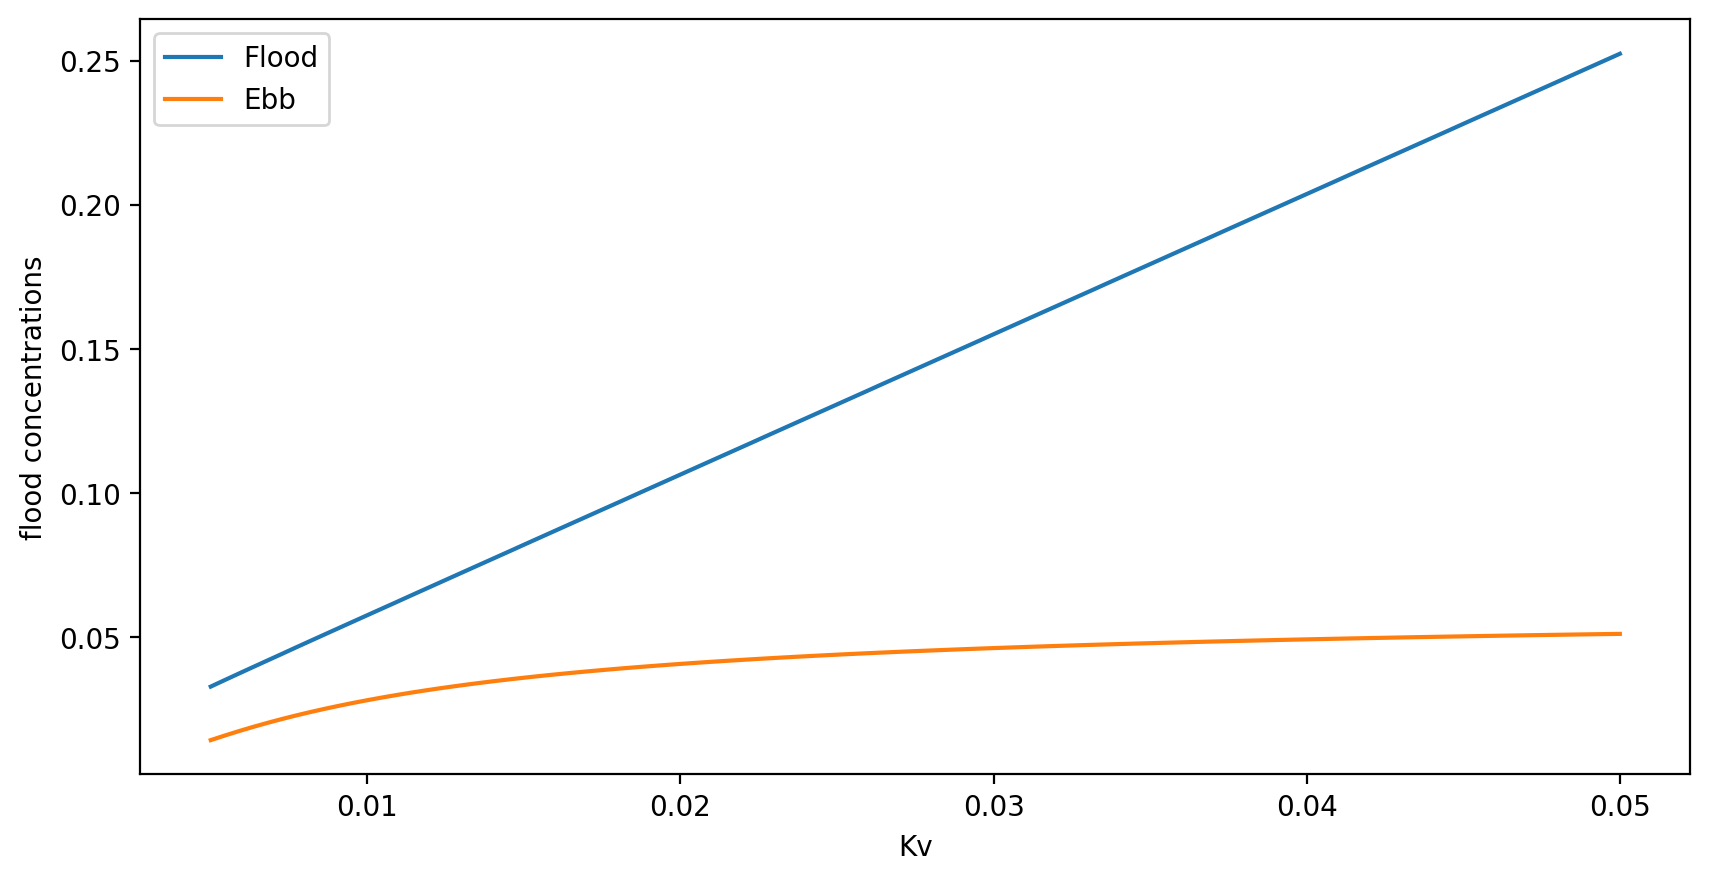

In [12]:
plt.plot(Kvar,maK,label='Flood')
plt.ylabel('flood concentrations')
plt.xlabel('Kv')
plt.plot(Kvar,miK,label='Ebb')
plt.legend()
